In [87]:
import pandas as pd

# Load the uploaded file
file_path = 'data/accuracy_list.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,threshold,accuracy
0,0.1200,0.745421
1,0.1201,0.747253
2,0.1202,0.747253
3,0.1203,0.747253
4,0.1204,0.747253


In [88]:
import matplotlib.pyplot as plt

# Extracting data for the trend plot
threshold = data['threshold']
accuracy = data['accuracy']

In [89]:
# Find the maximum accuracy and corresponding threshold
max_accuracy = accuracy.max()
max_threshold = threshold[accuracy.idxmax()]

In [90]:
print(f"Max accuracy:{max_accuracy}, Max threshold: {max_threshold}")

Max accuracy:0.7857142857142857, Max threshold: 0.1289000000000002


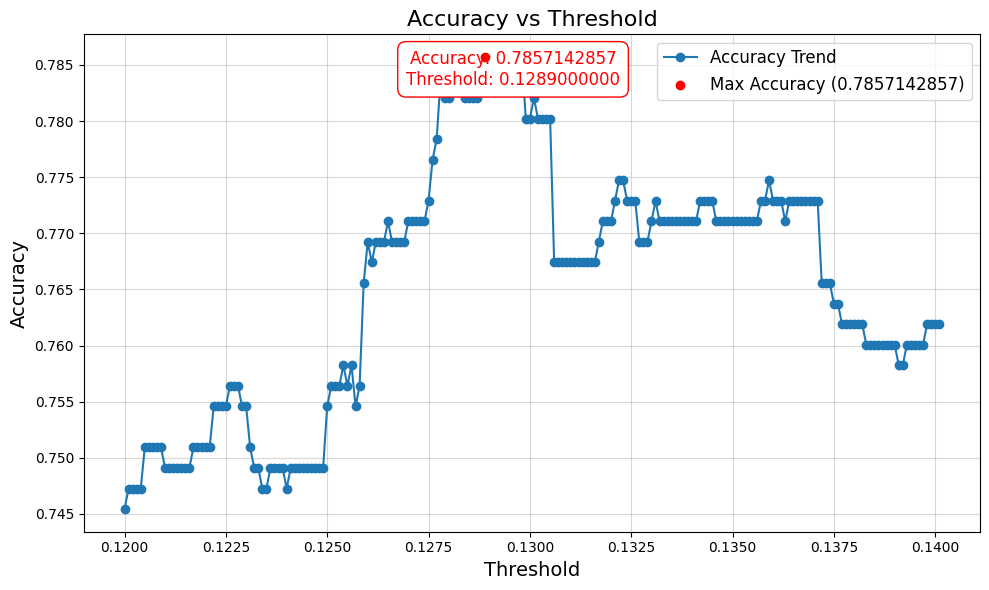

In [93]:
# Plotting the trend graph with the maximum point and its corresponding threshold highlighted
plt.figure(figsize=(10, 6))
plt.plot(threshold, accuracy, marker='o', linestyle='-', label='Accuracy Trend')
plt.scatter(max_threshold, max_accuracy, color='red', label=f'Max Accuracy ({max_accuracy:.10f})', zorder=5)

# Annotate the maximum point with accuracy and threshold
plt.annotate(f'Accuracy: {max_accuracy:.10f}\nThreshold: {max_threshold:.10f}', 
             (max_threshold, max_accuracy), 
             textcoords="offset points", 
             xytext=(20, -20), 
             ha='center', fontsize=12, color='red', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

plt.title('Accuracy vs Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [67]:
import ast

In [94]:
永豐銀行_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/永豐銀行_2022_300_50_matched_chunks.csv'
永豐銀行 = pd.read_csv(永豐銀行_2022_path)
永豐銀行 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 永豐銀行.iterrows()
]

In [95]:
富邦金控_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/富邦金控_2022_300_50_matched_chunks.csv'
富邦金控 = pd.read_csv(富邦金控_2022_path)
富邦金控 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 富邦金控.iterrows()
]

In [96]:
華泰銀行_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/華泰銀行_2022_300_50_matched_chunks.csv'
華泰銀行 = pd.read_csv(華泰銀行_2022_path)
華泰銀行 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 華泰銀行.iterrows()
]

In [97]:
開發金控_2021_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/開發金控_2021_300_50_matched_chunks.csv'
開發金控 = pd.read_csv(開發金控_2021_path)
開發金控 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 開發金控.iterrows()
]

In [98]:
新光金控_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/新光金控_2022_300_50_matched_chunks.csv'
新光金控 = pd.read_csv(新光金控_2022_path)
新光金控 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 新光金控.iterrows()
]

In [99]:
瑞興銀行_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/瑞興銀行_2022_300_50_matched_chunks.csv'
瑞興銀行 = pd.read_csv(瑞興銀行_2022_path)
瑞興銀行 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 瑞興銀行.iterrows()
]

In [100]:
def load_answer(institution, year):
    ANSWER_PATH = "data/answer/rank.xlsx"
    latest_answer_df = pd.read_excel(ANSWER_PATH)
    if(institution[2:4] == "金控"):
        institution = institution[0:2] + "金"
    # print(latest_answer_df)
    # print(institution)
    year = int(year)
    answer_for_institution = latest_answer_df[latest_answer_df['Financial_Institutions'] == institution]
    # print(f"Unique values in latest_answer_df['Year']: {latest_answer_df['Year'].unique()}")
    # print(f"Type of 'Year' column: {latest_answer_df['Year'].dtype}")
    # print(f"Value of year: {year}, type: {type(year)}")
    answer_for_institution = answer_for_institution[answer_for_institution['Year'] == year]

    # print(answer_for_institution)
    if not answer_for_institution.empty:
        columns_to_print = answer_for_institution.loc[:, "Q1":"Q82"].iloc[0].to_dict()
    else:
        raise ValueError(f"No matching answers found for institution {institution} in year {year}")

    # print(answer_for_institution.loc[:, "Q1":"Q82"])
    return columns_to_print

In [101]:
def calculate_accuracy(answer, report_dict):
    correct_count = 0
    total_questions = len(answer)

    for key, value in answer.items():
        if isinstance(value, float) and str(value) == 'nan':
            continue

        question_id = key[1:]  # 去掉 'Q' 提取後面的部分

        # 搜尋第二份資料的 Matched_Categories
        matched_categories = []
        for entry in report_dict:
            if 'Matched_Categories' in entry:
                for category in entry['Matched_Categories']:
                    clean_category = category.replace('#', '')  # 移除井字號
                    matched_categories.append(clean_category.split('_')[-1])  # 取最後的部分
        if question_id in matched_categories:
            # 第二份資料中有出現此類別
            if value == 1.0:
                correct_count += 1  # 答對
        else:
            # 第二份資料中沒有出現此類別
            if value == 0.0:
                correct_count += 1  # 答對

    accuracy = correct_count / total_questions
    return accuracy

In [102]:
print(f"永豐銀行:{calculate_accuracy(load_answer('永豐銀行', 2022), data_list_of_dicts)}")
print(f"富邦金控:{calculate_accuracy(load_answer('富邦金控', 2022), data_list_of_dicts)}")
print(f"華泰銀行:{calculate_accuracy(load_answer('華泰銀行', 2022), data_list_of_dicts)}")
print(f"開發金控:{calculate_accuracy(load_answer('開發金控', 2021), data_list_of_dicts)}")
print(f"新光金控:{calculate_accuracy(load_answer('新光金控', 2022), data_list_of_dicts)}")
print(f"瑞興銀行:{calculate_accuracy(load_answer('永豐銀行', 2022), data_list_of_dicts)}")

永豐銀行:0.8901098901098901
富邦金控:0.8461538461538461
華泰銀行:0.6703296703296703
開發金控:0.5274725274725275
新光金控:0.6813186813186813
瑞興銀行:0.8901098901098901
